In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
file1 = open('/content/gdrive/MyDrive/projectfolder/largetext.txt','r')
file2 = open('/content/gdrive/MyDrive/projectfolder/CharlotteMar2_2020.txt','r')
file3 = open('/content/gdrive/MyDrive/projectfolder/CharlestonFeb28_2020.txt','r')

manual_file1 = open("/content/gdrive/MyDrive/projectfolder/manual_keywords2.txt",'r')
manual_file2 = open("/content/gdrive/MyDrive/projectfolder/manual_keywords3.txt",'r')
manual_file3 = open("/content/gdrive/MyDrive/projectfolder/manual_keywords1.txt",'r')


In [ ]:
pip install rake-nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize 
import math
import operator
from rake_nltk import Rake
from matplotlib import pyplot as plt  
import random
import time
r = Rake()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def main(file,manual_file):
  doc1 = file.read()
  data_manual = manual_file.read()
  manual_phrases = data_manual.split("\n")
  manual_content_words = []
  for i in manual_phrases:
    w = i.split(" ")
    for j in w:
      if j not in manual_content_words:
        manual_content_words.append(j)
  doc=""
  for i in doc1:
    if i.isalpha():
      i=i.lower()
      doc+=i
    else:
      doc+=i


  total_sentences = sent_tokenize(doc)
  total_sent_len = len(total_sentences)
  total_words = word_tokenize(doc)
  total_word_len = len(total_words)


  tf_score = {}
  for each_word in total_words:
      each_word = each_word.replace('.','')
      if each_word not in stop_words:
          if each_word in tf_score:
              tf_score[each_word] += 1
          else:
              tf_score[each_word] = 1

  # Dividing by total_word_length for each dictionary element
  tf_score.update((x, y/int(total_word_len)) for x, y in tf_score.items())

  def check_sent(word, sentences): 
      final = [all([w in x for w in word]) for x in sentences] 
      sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
      return int(len(sent_len))

  idf_score = {}
  for each_word in total_words:
      each_word = each_word.replace('.','')
      if each_word not in stop_words:
          if each_word in idf_score:
              idf_score[each_word] = check_sent(each_word, total_sentences)
          else:
              idf_score[each_word] = 1

  removes=[]

  for x, y in idf_score.items():
    if int(y)==0:
      removes.append(x)
  for i in removes:
    idf_score.pop(i)
  # Performing a log and divide
  idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())

  tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()}

  tfidf_content_words=[]
  for i in tf_idf_score.keys():
    if i not in tfidf_content_words:
      tfidf_content_words.append(i)

  rake_content_words = []
  def rake_algorithm(data):
    r = Rake()
    r.extract_keywords_from_text(data)
    y=r.get_ranked_phrases()
    t=r.get_ranked_phrases_with_scores()
    for i in y:
      w = i.split(" ")
      for j in w:
        if j not in rake_content_words:
          rake_content_words.append(j)
  rake_algorithm(doc)
  similar_words_rake = []
  similar_words_tfidf=[]
  for i in tfidf_content_words:
    for j in manual_content_words:
      if i==j:
        if i not in similar_words_tfidf:
          similar_words_tfidf.append(i)
  for i in rake_content_words:
    for j in manual_content_words:
      if i==j:
        if i not in similar_words_rake:
          similar_words_rake.append(i)
  rake_similar = (len(similar_words_rake)/len(manual_content_words))*100
  tf_idf_similar = (len(similar_words_tfidf)/len(manual_content_words))*100
  return [tf_idf_similar,rake_similar]
  
  


In [ ]:
res3 = main(file1,manual_file1)
print(res3)


[98.33333333333333, 99.16666666666667]


In [ ]:
res1 = main(file2,manual_file2)
print(res1)

[67.7710843373494, 69.57831325301204]


In [ ]:
res2 = main(file3,manual_file3)
print(res2)

[85.91549295774648, 88.73239436619718]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


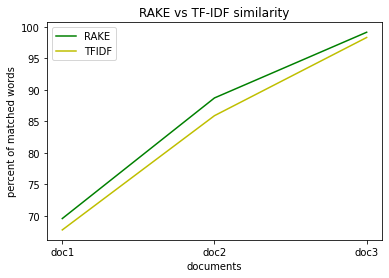

In [ ]:
x=["doc1","doc2","doc3"]
y1 = [res1[0],res2[0],res3[0]]
y2 = [res1[1],res2[1],res3[1]]
plt.plot(x, y2,label="RAKE", color='g')
plt.plot(x, y1,label="TFIDF", color='y')
plt.xlabel("documents")
plt.ylabel("percent of matched words")
plt.title('RAKE vs TF-IDF similarity') 
plt.legend(loc='upper left')
plt.show();